# Beaderstadt UCI Mushroom Dataset: Classification Machine Learning Midterm<br>
**Author:** Alissa Beaderstadt<br>
**Date:** November 6, 2025<br>

## Introduction
In this project, I explore the UCI Mushroom Dataset and apply classification models, specifically Decision Tree and Random Forest. The goal is to predict whether a mushroom is edible or poisonous based on its features, and then evaluate model performance using standard classification metrics. I also aim to determine which features have the highest influence on model performance.

## Imports
Import the necessary Python libraries for this notebook.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Mushroom feature mappings
Mapping feature codes to readable labels improves interpretability.

In [4]:
# Feature code mappings
mushroom_mappings = {
    "class": {'e': 'edible', 'p': 'poisonous'},
    "cap-shape": {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    "cap-surface": {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    "cap-color": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "bruises": {'t': 'bruises', 'f': 'no'},
    "odor": {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    "gill-attachment": {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing": {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size": {'b': 'broad', 'n': 'narrow'},
    "gill-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape": {'e': 'enlarging', 't': 'tapering'},
    "stalk-root": {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': np.nan},
    "stalk-surface-above-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type": {'p': 'partial'}, 
    "veil-color": {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number": {'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type": {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    "spore-print-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population": {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat": {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}


## Section 1. Import and Inspect the Data
### 1.1 Load the UCI Mushroom Dataset

In [5]:
df = pd.read_csv("data/agaricus-lepiota.data", header=None)

column_names = [
    "class","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape",
    "stalk-root","stalk-surface-above-ring","stalk-surface-below-ring",
    "stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color",
    "ring-number","ring-type","spore-print-color","population","habitat"
]
df.columns = column_names

# Map codes to labels
for col, mapping in mushroom_mappings.items():
    df[col] = df[col].map(mapping)

df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


### 1.2 Check for Missing Values and Display Summary Statistics

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Summary statistics for categorical features
summary_counts = df.describe(include='all')
summary_counts

Missing values per column:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Reflection 1:**
- What do you notice about the dataset?

  - The dataset is fairly large, with 8124 mushrooms and 23 features, which should give the models plenty of data to learn from.
  
  - Some features that stand out as potentially informative for predicting poisonous mushrooms are `cap-shape`, `gill-color`, and `odor`.
  
-  Are there any data issues?

   - There are missing values in the `stalk-root` feature (2480 entries), but the rest of the dataset looks clean with no unexpected entries.


## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions
- Since all features in this dataset are categorical, I’ll use countplots to explore feature distributions.  
- I’ll focus on features that are known to be strongly predictive of mushroom edibility, including:  
  - **odor, gill-color, cap-shape, bruises, and spore-print-color.**  

- I’ll also examine the **target variable (`class`)** to check for any class imbalance.  

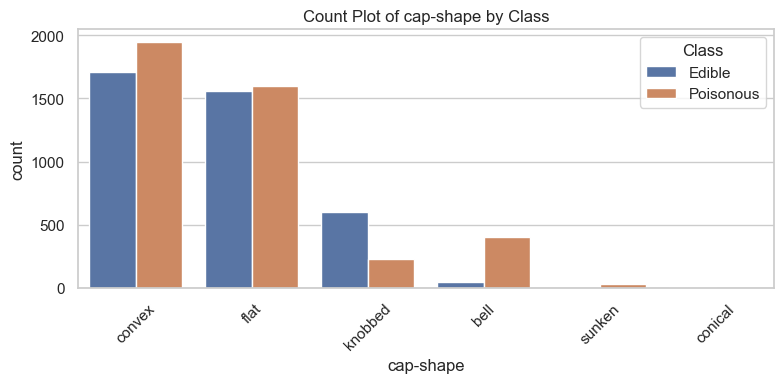

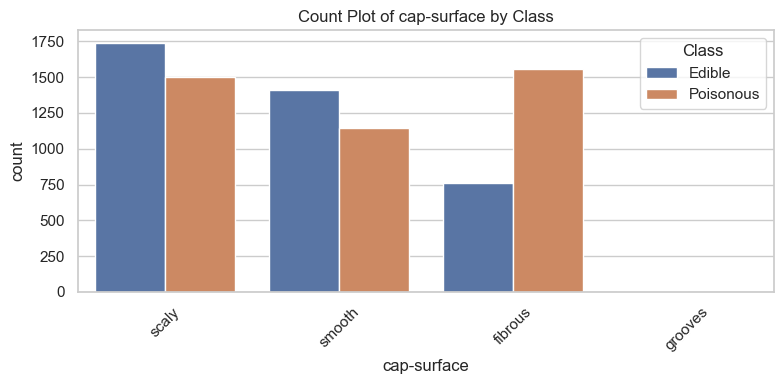

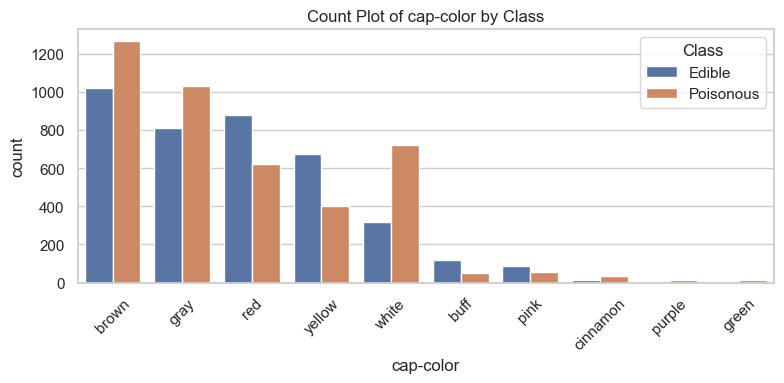

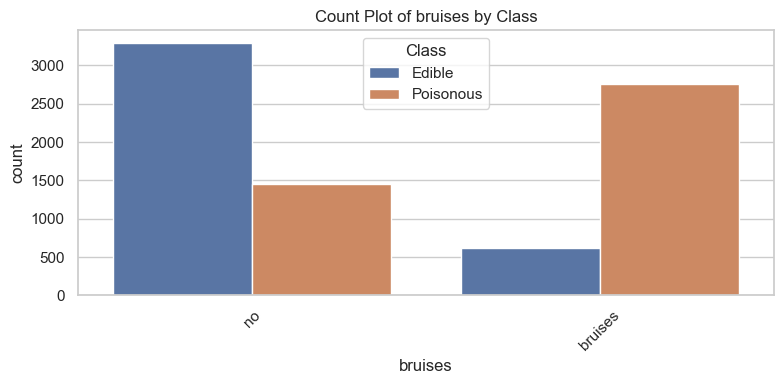

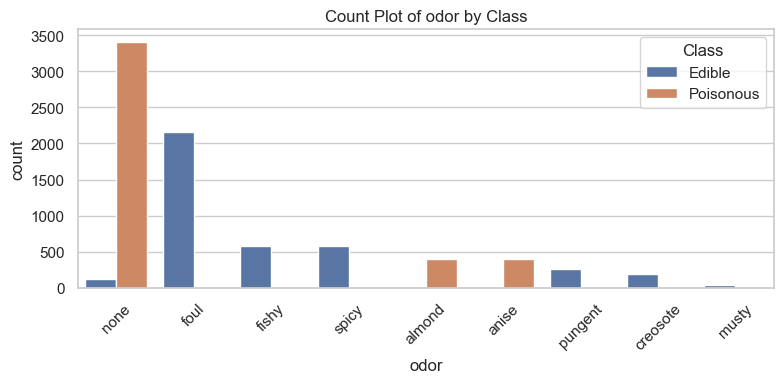

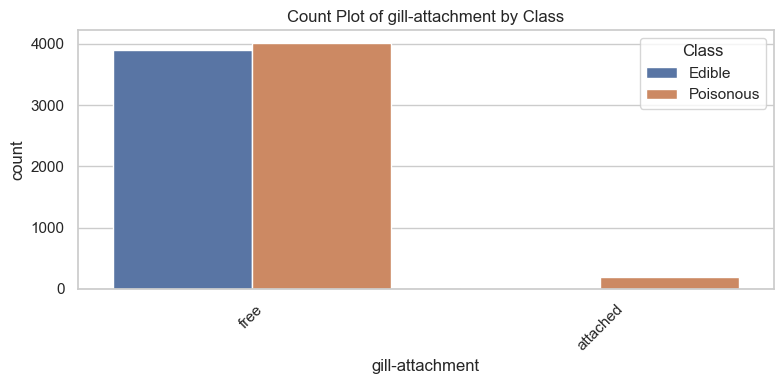

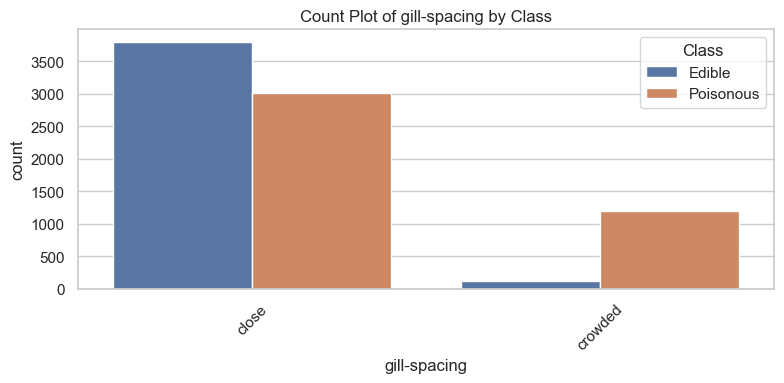

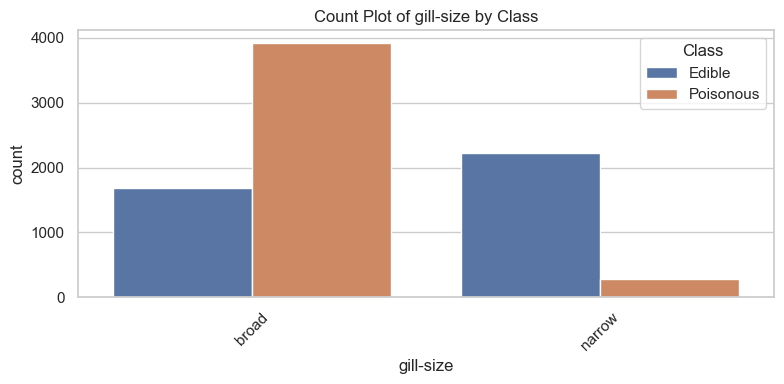

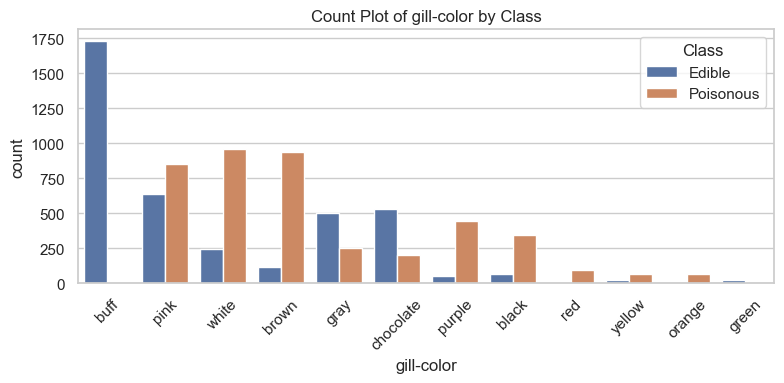

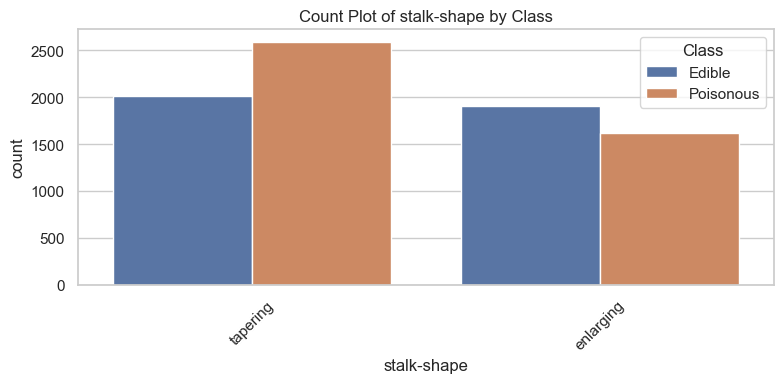

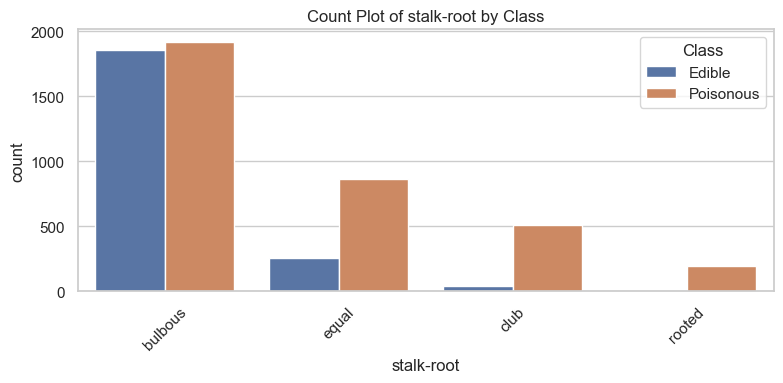

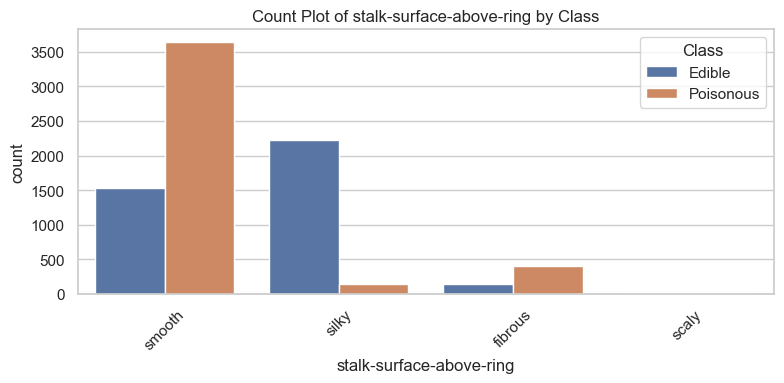

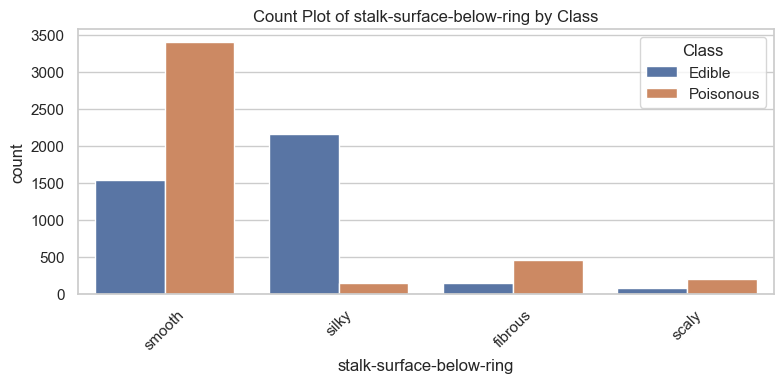

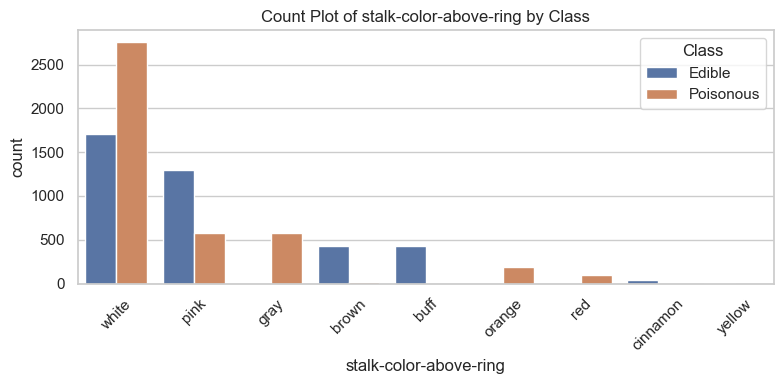

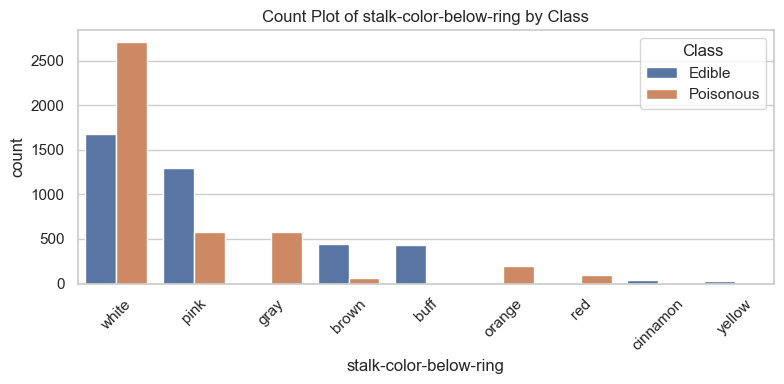

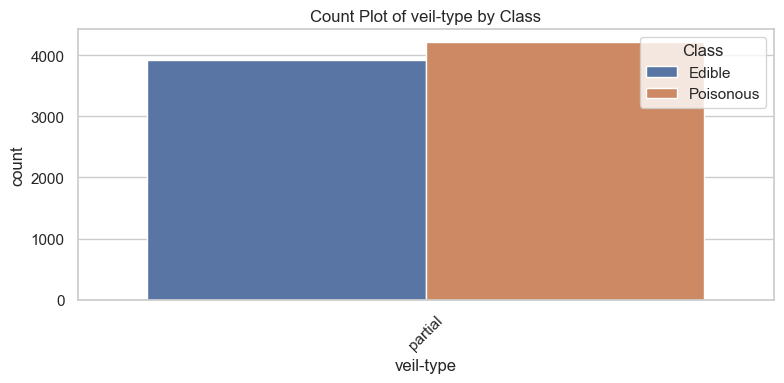

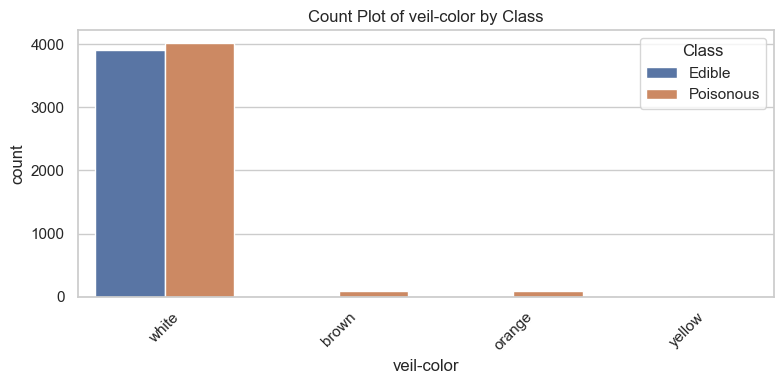

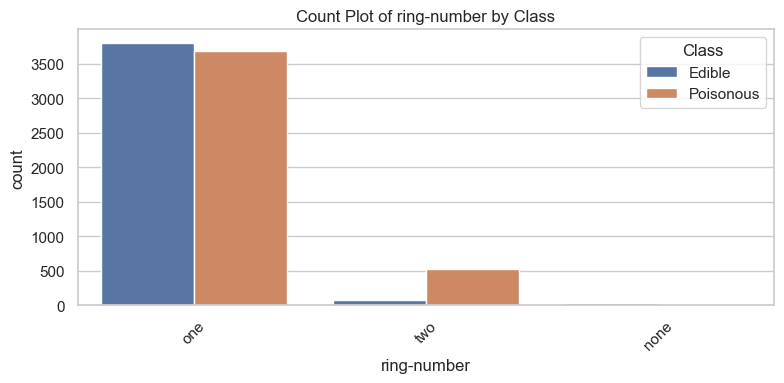

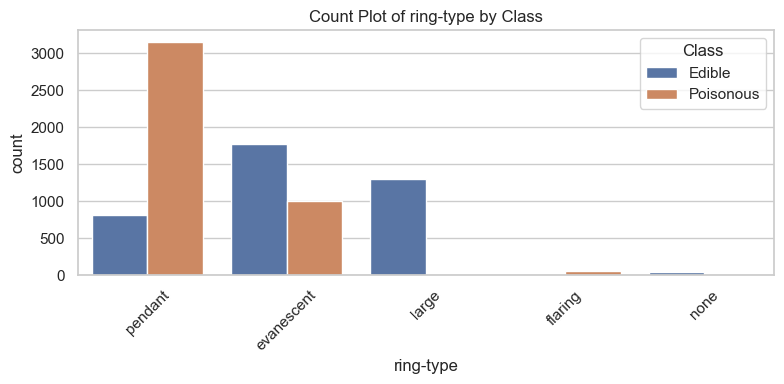

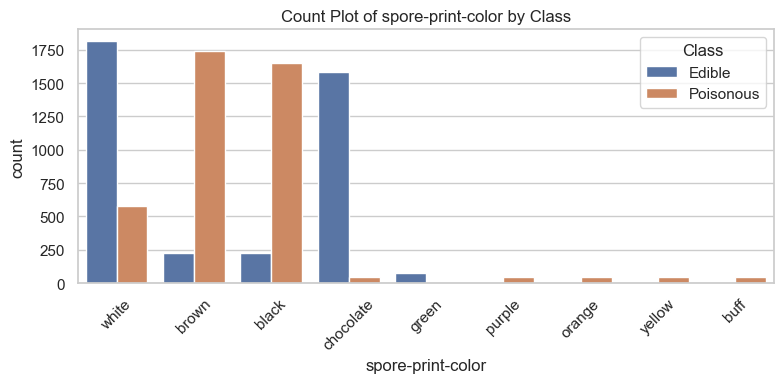

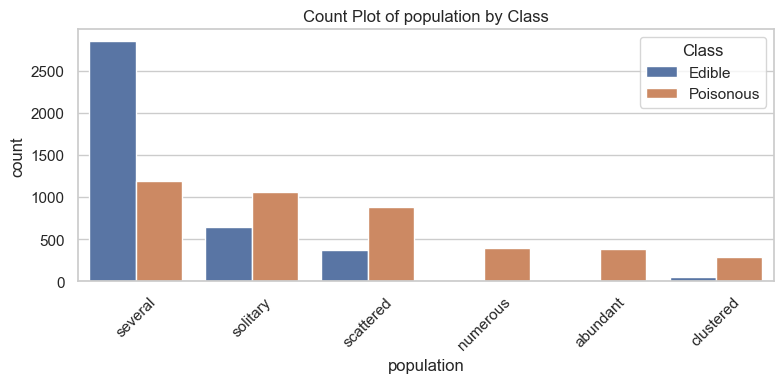

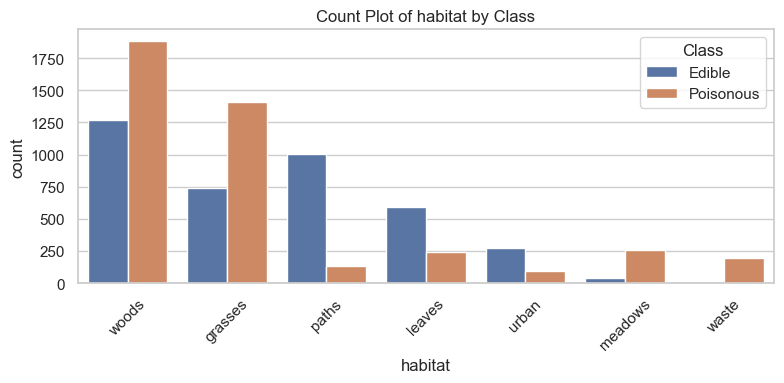

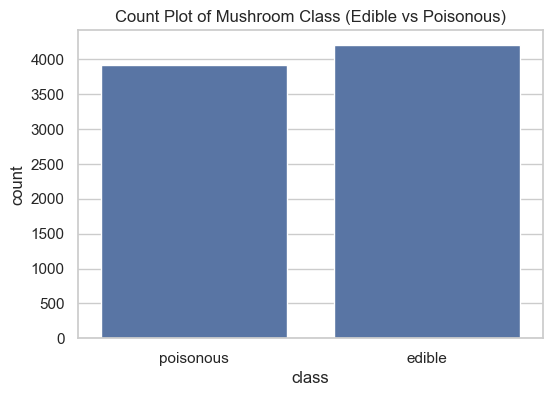

In [7]:
sns.set(style="whitegrid")

# Loop through all features except 'class'
for feature in df.columns:
    if feature == 'class':
        continue
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature, hue='class', order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature} by Class')
    plt.xticks(rotation=45)
    plt.legend(title='Class', labels=['Edible', 'Poisonous'])
    plt.tight_layout()
    plt.show()

# Plot target variable class balance separately
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class')
plt.title('Count Plot of Mushroom Class (Edible vs Poisonous)')
plt.show()


`Note:`<br>

- The target classes are fairly balanced, with roughly half the mushrooms being edible and half poisonous, which is good for training classification models without major bias.

  - **Patterns**: `Odor` seems to show clear division with edibility/poisonous class.  
  - **Outliers**: `veil-type` had only one category so it was not visualized.
  - **Anomalies**: `stalk-root` has 2480 missing values (~30%), and `stalk-shape` appears to provide little predictive value with no clear division between class.

### 2.2 Handle Missing Values and Clean Data

- Rather than dropping rows for the missing `stalk-root` values, I’ll keep these as a separate `"missing"` category to preserve potential information.  
- Drop uninformative `veil-type` column. 
- Convert categorical features to numeric via one-hot encoding.


In [8]:
# Handle missing values
df['stalk-root'] = df['stalk-root'].fillna('missing')  # convert NaN to "missing"

# Drop uninformative features
if 'veil-type' in df.columns:
    df.drop(columns=['veil-type'], inplace=True)

# One-hot encode all categorical features
X = df.drop('class', axis=1)
y = df['class']

X_encoded = pd.get_dummies(X, drop_first=True).astype(int)  # convert booleans to 0/1
y_encoded = y.map({'edible':0, 'poisonous':1})

print(f"Shape of feature matrix: {X_encoded.shape}")
X_encoded.head()
y_encoded.value_counts()


Shape of feature matrix: (8124, 95)


class
0    4208
1    3916
Name: count, dtype: int64

### 2.3 Feature Selection and Engineering
- Created `cap-color-group` to combine cap colors into "light" and "dark". 
- For tree-based models (Decision Tree, Random Forest), scaling is not needed.  

In [9]:
# Create color grouping feature
light_colors = ['white', 'yellow', 'pink', 'orange', 'buff']
dark_colors = ['brown', 'black', 'gray', 'purple', 'green', 'red']

df['cap-color-group'] = df['cap-color'].apply(lambda x: 'light' if x in light_colors else 'dark')

# One-hot encode the new feature
df = pd.get_dummies(df, columns=['cap-color-group'], drop_first=True)


`Note:` 
- If cap-color-group_light = 1, the original group was "light".
- If cap-color-group_light = 0, the group was "dark".

**Reflection 2:**
- What patterns or anomalies do you see? 

  - The dataset is pretty evenly split between poisonous and edible.The majority of mushrooms have only one ring and have a convex cap shape. Those with attatched gills appear to always be poisonous so this may be a strong predictor.
  
  - Odor definitely stands out. Certain smells (like foul or fishy) are almost always poisonous, while almond or anise odors show up mostly in edible mushrooms. Gill color and spore print color also seem to vary a lot between the two classes, so color features might end up being pretty useful for predictions.
  
- What preprocessing steps were necessary to clean and improve the data?

  - I filled in missing values with “missing” and dropped a feature (veil-type) since it only had one category and didn’t add any value.
  
- Did you create or modify any features to improve performance?

  - I added a new feature called cap-color-group that combines cap colors into “light” and “dark” tones to capture general visual patterns that might relate to edibility.

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
**Input features:**
- `odor`, `gill-color`, `cap-shape`, `bruises`, `spore-print-color`, `cap-color-group`

**Target variable:**
- `class` (edible vs. poisonous)

**Justification:**
- I selected these features because the above countplots suggest they separate edible and poisonous mushrooms effectively.
- `cap-color-group` was added to capture broader color patterns.
- `class` is the natural target since the goal is to predict edibility.

## 3.2 Define X and y
- Assign input features to X
- Assign target variable to y

In [10]:
# -----------------------------
# Feature = odor
# -----------------------------
X1 = df[['odor']]   # Input feature as 2D DataFrame
y1 = df['class']    # Target variable as 1D Series

# -----------------------------
# Feature = gill-color
# -----------------------------
X2 = df[['gill-color']]
y2 = df['class']

# -----------------------------
# Feature = cap-shape
# -----------------------------
X3 = df[['cap-shape']]
y3 = df['class']

# -----------------------------
# Feature = bruises
# -----------------------------
X4 = df[['bruises']]
y4 = df['class']

# -----------------------------
# Feature = spore-print-color
# -----------------------------
X5 = df[['spore-print-color']]
y5 = df['class']

# -----------------------------
# Feature = cap-color-group (one-hot encoded)
# -----------------------------
X6 = df[['cap-color-group_light']]  # this is the one-hot column created
y6 = df['class']

# -----------------------------
# Multi-feature: combine all key features
# -----------------------------
X_all = df[['odor', 'gill-color', 'cap-shape', 'bruises', 'spore-print-color', 'cap-color-group_light']]
y_all = df['class']

**Reflection 3:**
- Why did you choose these features?

  - I focused on the features that showed the clearest differences between edible and poisonous mushrooms in the countplots, like `odor`, `gill-color`, `cap-shape`, `bruises`, and `spore-print-color`. I also included my engineered feature `cap-color-group` to capture a broader visual pattern from the cap color.
 
- How might they impact predictions or accuracy?

  - Using these key features should help the models pick up strong patterns, like certain odors being almost always poisonous. The multi-feature combination gives the model more context, which can improve accuracy. The one-hot encoded `cap-color-group` gives a bit more detail without repeating info, so it should give a small boost in predictive power, especially for models that can use numeric inputs.

## Section 4. Train a Model (Decision Tree)
### 4.1 Split the data into training and test sets using train_test_split.

In [11]:
# One-hot encode all categorical features in X
X_encoded = pd.get_dummies(X_all, drop_first=True)

# Multi-feature case 
X = X_encoded
y = y_all

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


`Note:`
- random_state=42 makes results reproducible.
- stratify=y keeps class proportions balanced.
- `pd.get_dummies` converts categorical features into numeric so models like Decision Tree and Random Forest can use them.

### 4.2 Train model using Scikit-Learn model.fit() method.

In [12]:
# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evalulate performance
- Key metrics: Accuracy, Precision, Recall, F1-score, and the Confusion Matrix.


Training Results:
Accuracy: 1.00
Precision (poisonous): 1.00
Recall (poisonous): 0.99
F1-score (poisonous): 1.00


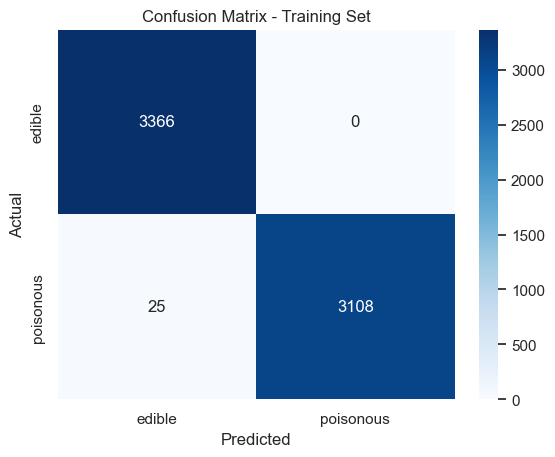

In [13]:
# -----------------------------
# Training predictions & evaluation
# -----------------------------
y_train_pred = dt_model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred, pos_label='poisonous')
rec_train = recall_score(y_train, y_train_pred, pos_label='poisonous')
f1_train = f1_score(y_train, y_train_pred, pos_label='poisonous')
cm_train = confusion_matrix(y_train, y_train_pred, labels=['edible','poisonous'])

print("Training Results:")
print(f"Accuracy: {acc_train:.2f}")
print(f"Precision (poisonous): {prec_train:.2f}")
print(f"Recall (poisonous): {rec_train:.2f}")
print(f"F1-score (poisonous): {f1_train:.2f}")

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`Note:`
- The training confusion matrix shows that the model predicted almost everything correctly on the training data. There were 3,366 edible mushrooms correctly identified and 3,108 poisonous mushrooms correctly identified. Only 25 poisonous mushrooms were misclassified as edible, and no edible mushrooms were misclassified as poisonous.

Test Results:
Accuracy: 0.99
Precision (poisonous): 1.00
Recall (poisonous): 0.99
F1-score (poisonous): 0.99


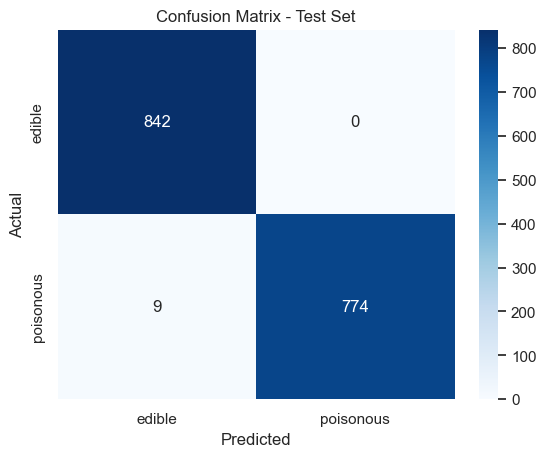

In [14]:
# -----------------------------
# Test predictions & evaluation
# -----------------------------
y_test_pred = dt_model.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred, pos_label='poisonous')
rec_test = recall_score(y_test, y_test_pred, pos_label='poisonous')
f1_test = f1_score(y_test, y_test_pred, pos_label='poisonous')
cm_test = confusion_matrix(y_test, y_test_pred, labels=['edible','poisonous'])

print("Test Results:")
print(f"Accuracy: {acc_test:.2f}")
print(f"Precision (poisonous): {prec_test:.2f}")
print(f"Recall (poisonous): {rec_test:.2f}")
print(f"F1-score (poisonous): {f1_test:.2f}")

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`Note:`
- The confusion matrix shows that the model predicted almost everything correctly. There were 842 edible mushrooms correctly identified and 774 poisonous mushrooms correctly identified. Only 9 poisonous mushrooms were misclassified as edible, and no edible mushrooms were misclassified as poisonous.

### Decision Tree Visualization

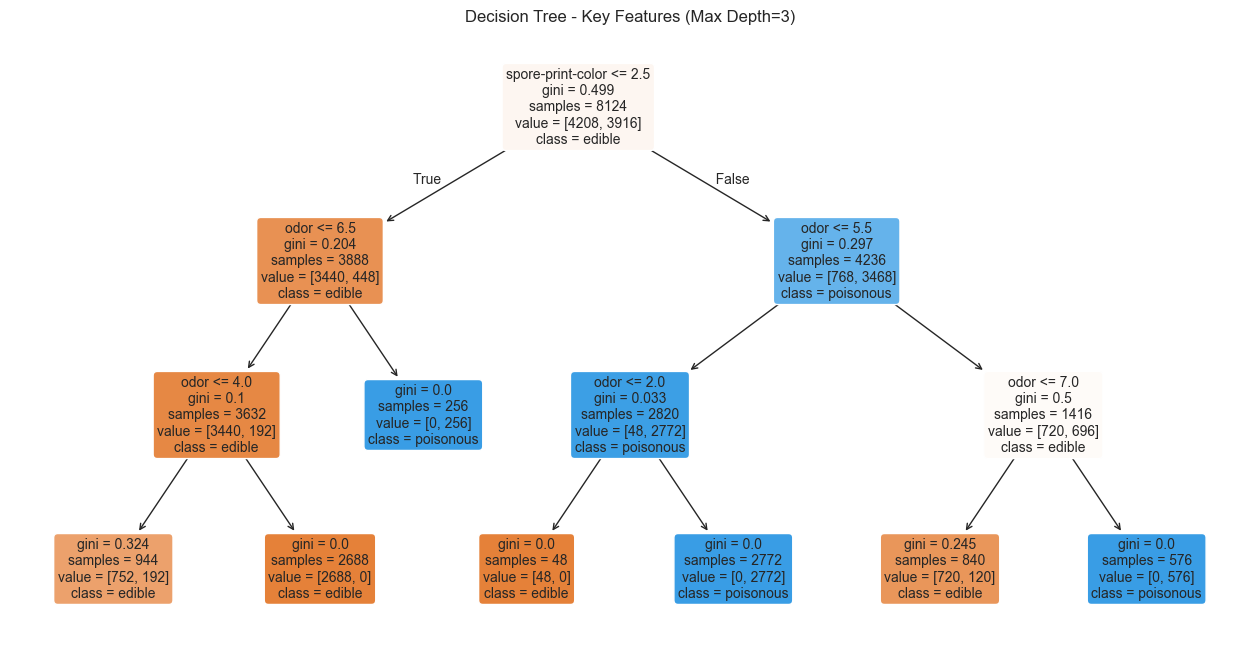

In [15]:
key_features = ['odor', 'gill-color', 'cap-shape', 'bruises', 'spore-print-color', 'cap-color-group_light']
X_simple = X_all[key_features]
y_simple = y_all

for col in X_simple.columns:
    X_simple[col] = X_simple[col].astype('category').cat.codes

# Fit a simple tree
dt_simple_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_simple_depth.fit(X_simple, y_simple)

# Plot the tree
fig = plt.figure(figsize=(16,8))
plot_tree(
    dt_simple_depth,
    feature_names=key_features,
    class_names=['edible','poisonous'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Key Features (Max Depth=3)")
plt.show()

`Note:`
- This simplified Decision Tree shows the top splits using key features. Limiting the depth makes it easier to see which features are most important for classifying mushrooms as edible or poisonous.
- The tree uses Gini impurity to decide splits. Odor is the first split, this shows it’s the most important feature for separating edible vs poisonous mushrooms. The numbers in each node indicate the number of samples and how many belong to each class.

**Reflection 4:**
- How well did the model perform?
  
  - The Decision Tree did really well. It was almost perfect on both the training and test sets. It picked up on the strong patterns in features like odor and cap-color-group, which made it easy to separate edible and poisonous mushrooms.
- Any surprises in the results?
  
  - It was impressive how even a few key features could get near perfect accuracy. The tiny drop from training to test suggests a tiny bit of overfitting, but nothing concerning. The model generalizes really well.

## Section 5. Improve the Model or Try Alternates
### 5.1 Train Random Forest

In [16]:
# Train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest Training Results:
Accuracy: 1.00
Precision (poisonous): 1.00
Recall (poisonous): 0.99
F1-score (poisonous): 1.00


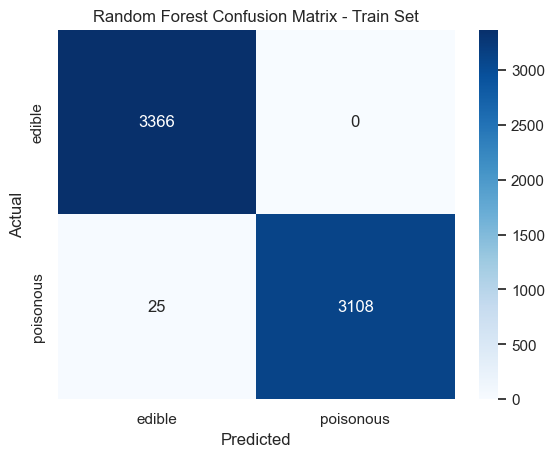

In [20]:
# Evaluate on training set & plot confusion matrix
y_train_pred = rf_model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred, pos_label='poisonous')
rec_train = recall_score(y_train, y_train_pred, pos_label='poisonous')
f1_train = f1_score(y_train, y_train_pred, pos_label='poisonous')
cm_train = confusion_matrix(y_train, y_train_pred)

print("Random Forest Training Results:")
print(f"Accuracy: {acc_train:.2f}")
print(f"Precision (poisonous): {prec_train:.2f}")
print(f"Recall (poisonous): {rec_train:.2f}")
print(f"F1-score (poisonous): {f1_train:.2f}")

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible','poisonous'],
            yticklabels=['edible','poisonous'])
plt.title('Random Forest Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`Note:`
- The confusion matrix shows that the model predicted almost everything correctly. There were 3366 edible mushrooms correctly identified and 3108 poisonous mushrooms correctly identified. Only 25 poisonous mushrooms were misclassified as edible, and no edible mushrooms were misclassified as poisonous.


Random Forest Test Results:
Accuracy: 0.99
Precision (poisonous): 1.00
Recall (poisonous): 0.99
F1-score (poisonous): 0.99


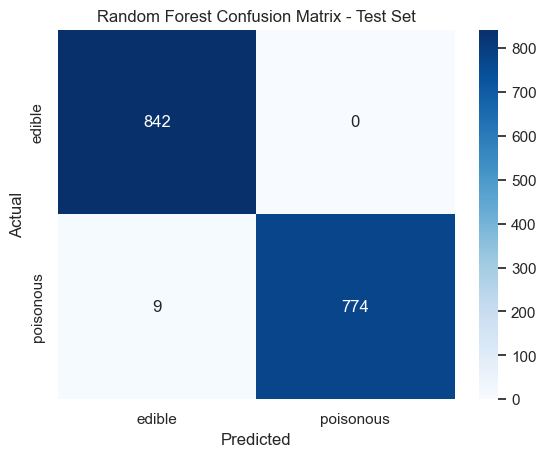

In [18]:
# Evaluate on test set & plot confusion matrix
y_test_pred = rf_model.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred, pos_label='poisonous')
rec_test = recall_score(y_test, y_test_pred, pos_label='poisonous')
f1_test = f1_score(y_test, y_test_pred, pos_label='poisonous')
cm_test = confusion_matrix(y_test, y_test_pred, labels=['edible','poisonous'])

print("\nRandom Forest Test Results:")
print(f"Accuracy: {acc_test:.2f}")
print(f"Precision (poisonous): {prec_test:.2f}")
print(f"Recall (poisonous): {rec_test:.2f}")
print(f"F1-score (poisonous): {f1_test:.2f}")

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
plt.title('Random Forest Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`Note:`
- The confusion matrix shows that the model predicted almost everything correctly. There were 842 edible mushrooms correctly identified and 774 poisonous mushrooms correctly identified. Only 9 poisonous mushrooms were misclassified as edible, and no edible mushrooms were misclassified as poisonous.

### 5.2 Compare performance of all models across the same performance metrics.

| Model         | Accuracy | Precision (poisonous) | Recall (poisonous) | F1-score (poisonous) |
| ------------- | -------- | --------------------- | ------------------ | -------------------- |
| Decision Tree | 1.00     | 1.00                  | 0.99               | 1.00                 |
| Random Forest | 1.00     | 1.00                  | 0.99               | 1.00                 |


**Reflection 5:**
- Which model performed better?
  
  - Both the Decision Tree and Random Forest performed nearly perfectly, with almost identical accuracy, precision, recall, and F1-scores.
- Why might one classifier be more effective in this specific case?
  
  - The features in this dataset are highly predictive (especially odor), so even a single Decision Tree does an excellent job. However, the Random Forest adds extra stability by averaging across many trees, which helps with generalization and reduces the tiny risk of overfitting.

## Section 6. Final Thoughts & Insights

### 6.1 Feature Importance Visualization
- One-hot encoded columns were regrouped by original feature to produce a meaningful importance chart.

- Random Forest confirms `odor` and `spore-print-color` as the top predictors:

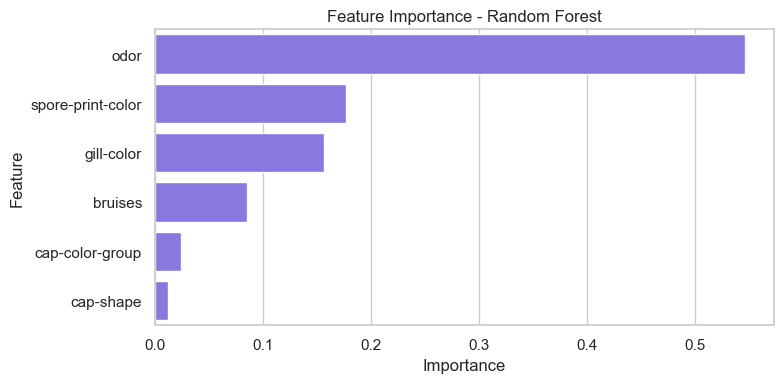

In [21]:
# Group one-hot columns by original feature
feature_groups = {
    'odor': [col for col in X_encoded.columns if col.startswith('odor_')],
    'gill-color': [col for col in X_encoded.columns if col.startswith('gill-color_')],
    'cap-shape': [col for col in X_encoded.columns if col.startswith('cap-shape_')],
    'bruises': [col for col in X_encoded.columns if col.startswith('bruises_')],
    'spore-print-color': [col for col in X_encoded.columns if col.startswith('spore-print-color_')],
    'cap-color-group': [col for col in X_encoded.columns if col.startswith('cap-color-group_')]
}

# Sum importances within each group
agg_importances = {feature: rf_model.feature_importances_[X_encoded.columns.get_indexer(cols)].sum() 
                   for feature, cols in feature_groups.items()}

# Convert to Series and sort
agg_importances = pd.Series(agg_importances).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=agg_importances.values, y=agg_importances.index, color="mediumslateblue")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Adjust spacing and save
plt.tight_layout()
plt.savefig("feature_importance_rf.png", dpi=300)
plt.show()

### Top features and model performance
| Model         | Top Features     | Train Accuracy | Test Accuracy | Precision (poisonous) | Recall (poisonous) | F1-score (poisonous) |
| ------------- | ---------------- | -------------- | ------------- | --------------------- | ------------------ | -------------------- |
| Decision Tree | odor, spore-print-color | 1.00           | 0.99          | 1.00                  | 0.99               | 1.00                 |
| Random Forest | odor, spore-print-color | 1.00           | 0.99          | 1.00                  | 0.99               | 0.99                 |




### 6.2 Key findings
- `Odor` is the strongest predictor; certain values almost perfectly separate poisonous from edible. 
   
- `Spore-print-color` and `bruising` were also strong predictors that reinforced model confidence.
  
- Individual features like `odor` and `spore-print-color` were more influential than the engineered `cap-color-group` feature. This suggests that grouping color shades reduced predictive precision.  
  
- Both **Decision Tree** and **Random Forest** achieved near-perfect accuracy (~99%), showing minimal overfitting.
  
- Overall, the models confirmed that mushroom edibility can be predicted very reliably from these categorical features when properly encoded.


### 6.3 Challenges
- One-hot encoding all categorical features was necessary for model compatibility.

- Including the `cap-color-group` feature required trial and error to keep it compatible with the models.

- Initial feature importance visualization had 31 columns; regrouping them by original feature was needed for clarity.

### 6.4 Next Steps
- Create additional engineered features (combining odor and cap-color).

- Test other algorithms to compare performance and interpretability.


**Reflection 6:**
- What did you learn from this project?
  
  - This project showed me how powerful tree-based models can be when features are clean and well prepared. I gained hands-on practice with encoding, train/test splits, and evaluating multiple performance metrics. The most interesting insight was that some features, like `odor`, can almost perfectly separate classes on their own, while Random Forest adds reliability and confidence in the results.
